In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
img_array = cv2.imread("train/0/Training_3908.jpg")

In [3]:
img_array.shape #rgb image 

(48, 48, 3)

In [4]:
print(img_array)

[[[163 163 163]
  [128 128 128]
  [114 114 114]
  ...
  [139 139 139]
  [141 141 141]
  [134 134 134]]

 [[147 147 147]
  [114 114 114]
  [102 102 102]
  ...
  [142 142 142]
  [138 138 138]
  [138 138 138]]

 [[112 112 112]
  [106 106 106]
  [ 92  92  92]
  ...
  [140 140 140]
  [141 141 141]
  [134 134 134]]

 ...

 [[139 139 139]
  [141 141 141]
  [136 136 136]
  ...
  [154 154 154]
  [171 171 171]
  [191 191 191]]

 [[140 140 140]
  [133 133 133]
  [120 120 120]
  ...
  [138 138 138]
  [146 146 146]
  [158 158 158]]

 [[136 136 136]
  [134 134 134]
  [113 113 113]
  ...
  [146 146 146]
  [144 144 144]
  [144 144 144]]]


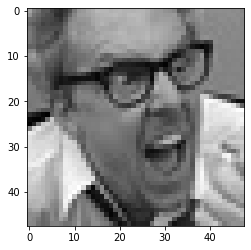

In [5]:
plt.imshow(img_array)

In [6]:
Datadirectory = "train/"  #training dataset 

In [7]:
Classes = ["0", "1", "2", "3", "4", "5", "6"] #list of classes

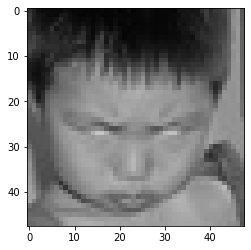

In [8]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break
    
    # reading all the images 

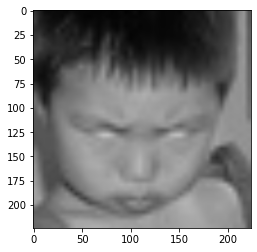

In [9]:
img_size = 224  # changing image size from 48*48 to 224 to 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
new_array.shape

(224, 224, 3)

# read all the images and convert them to array

In [11]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass


In [12]:
create_training_Data()

In [13]:
print(len(training_Data))

28709


In [14]:
import random

random.shuffle(training_Data)

In [15]:
X = [] ## data/feature
y = [] ## label

for features, label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X, dtype='uint8').reshape(-1, img_size, img_size, 3) ## converting it to 4 dimension
y = np.array(y, dtype='uint8')

In [16]:
X.shape

(28709, 224, 224, 3)

In [17]:
for i in range(0,28709):
    X[i] = X[i]/143.0    # normalzing the data 

### Deep learning model for training - Transfer Learning

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
model = tf.keras.applications.MobileNetV2() ## pre trained model

## Transfer Learning - Tuning, weights will start from last check point

In [20]:
base_input = model.layers[0].input #first layer

In [21]:
base_output = model.layers[-2].output 

In [22]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [23]:
final_output = layers.Dense(128)(base_output) #adding new layer, after the output of global polling layer
final_ouput = layers.Activation('relu')(final_output) # activation function
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_ouput) # my classes are 7 , classification layer

In [24]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [25]:
new_model = keras.Model(inputs = base_input, outputs = final_output) # creating new model

In [26]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [27]:
new_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])

In [28]:
# new_model.fit(X,y, epochs = 12)

In [29]:
#new_model.save('Final_model__new_82p23.h5')

In [30]:
# new_model.fit(X,y, epochs = 7)

In [31]:
## new_model.save('my_model_25p90.h5')

In [32]:
new_model = tf.keras.models.load_model('Final_model__new_82p23.h5')

In [33]:
# new_model.fit(X,y, epochs = 14)

In [34]:
frame = cv2.imread("images/AdobeStock_164398147-750x500.jpeg")


In [35]:
frame.shape

(500, 750, 3)

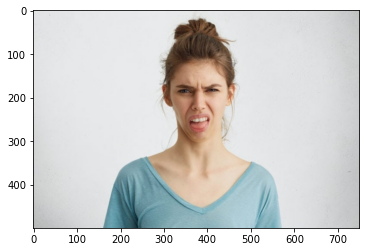

In [36]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [37]:
# we need to crop image to detect the face , 
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [38]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [39]:
gray.shape

(500, 750)

In [40]:
# fidning multiple faces in image 
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 255, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

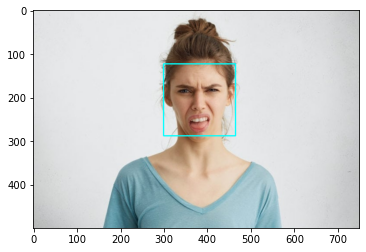

In [41]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

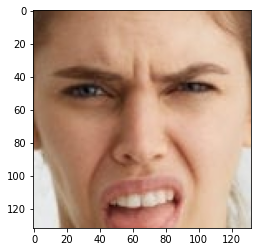

In [42]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB)) # crop image 

In [43]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis=0) # need fourth dimension 
final_image = final_image/255.0

In [44]:

predictions = new_model.predict(final_image)


In [45]:
predictions[0]

array([0.06545024, 0.8083568 , 0.04824907, 0.02981342, 0.02280262,
       0.02193013, 0.00339776], dtype=float32)

In [46]:
np.argmax(predictions)

1

In [47]:
np.sort(predictions)

array([[0.00339776, 0.02193013, 0.02280262, 0.02981342, 0.04824907,
        0.06545024, 0.8083568 ]], dtype=float32)

###### 0  -------  Angry
###### 1  -------  disgust
###### 2  -------  fear
###### 3  -------  happy
###### 4  -------  neutral
###### 5  -------  Sad
###### 6  -------  surprise


In [ ]:

import cv2 ### pip install opencv-python

## pip install opencv-contrib-python  fullpackage 

# from deepface import DeepFace ## pip install deepface

path="haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# set the rectangle Background to white
rectangle_bgr = (255, 255, 255) 

# make a black image
img = np.zeros((500, 500))

# set some text
text= "Some text in a box!"
# get the width and height of the text box

(text_width, text_height) =  cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0] 

# SET THE TEXT START POSITION 
text_offset_x = 10

text_offset_y = img.shape[0] - 25

# make the coords of the cox with a smalt padding of two pixels
box_coords =  ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2)) 
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED) 
cv2.putText (img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cap= cv2.VideoCapture (1)

# Check if the webcam is  opened correctly
if not cap.isOpened():
    cap=cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError(" CANANOT OEPN wEBCAM")
    
    
while True:
    ret, frame = cap.read()
    # eye_cascade=cv2.CascAdeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml') 
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess= faceCascade.detectMultiScale(roi_gray)
        if len(facess)== 0:
            print("Face not detected")
        else:
            for (ex,ey,ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew] ## cropping the face

    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims (final_image, axis=0) ## need fourth dimension
    final_image=final_image/255.0
   
    font = cv2.FONT_HERSHEY_SIMPLEX 
    
    Predictions = new_model.predict(final_image)
    
    font_scale=1.5
    font=cv2.FONT_HERSHEY_PLAIN
    
    if (np.argmax (Predictions)==0):
        status= "Angry"
        x1,y1,w1,h1=0,0,175,75 
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1+h1), (0,0,0), -1) 
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status, (100, 150), font, 3,(0, 0, 255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    
    elif (np.argmax(Predictions)==1):
        status = "Disgust"
        x1,y1,w1,h1=0,0,175,75 
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1+h1), (0,0,0), -1) 
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status, (100, 150), font, 3,(0, 0, 255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (np.argmax(Predictions)==2):
        status = "FEAR"
        x1,y1,w1,h1=0,0,175,75 
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1+h1), (0,0,0), -1) 
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status, (100, 150), font, 3,(0, 0, 255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
   
    elif (np.argmax(Predictions)==3):
        status = "HAPPY"
        x1,y1,w1,h1=0,0,175,75 
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1+h1), (0,0,0), -1) 
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status, (100, 150), font, 3,(0, 0, 255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))  
    
    elif (np.argmax(Predictions)==4):
        status = "Sad"
        x1,y1,w1,h1=0,0,175,75 
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1+h1), (0,0,0), -1) 
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status, (100, 150), font, 3,(0, 0, 255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (np.argmax(Predictions)==5):
        status = "Surprise"
        x1,y1,w1,h1=0,0,175,75 
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1+h1), (0,0,0), -1) 
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status, (100, 150), font, 3,(0, 0, 255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255)) 
        
        
    else:
        status = "Neutral"
        
        x1,y1,w1,h1=0,0,175,75 
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1+h1), (0,0,0), -1) 
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255, 0), 2)
        
        cv2.putText(frame,status, (100, 150), font, 3,(0, 255, 0),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0))
        
        
# gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#print(faceCascade.empty())
#faces=faceCascade.detectMultiScale(gray, 1.1,4)

# draw a rectangle around the faces

#for(x, y, w, h) in faces:
# cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0),2)
